<a href="https://colab.research.google.com/github/klukman/UAS-Big-Data/blob/main/UAS_Big_Data_21_21_1521_Lukman_Arisandi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UAS BIG DATA & PREDICTIVE ANALYTICS

## Nama : Lukman Arisandi 
## NIM : 21.21.1521
## Kelas : Transfer (20S1IF06)
## Kelompok : 10

silahkan bisa dicari masing-masing a.k.a kelompok yang menentukan. 
1. Dataset cari dr UCI berupa timeseries
2. Tidak boleh sama antar kelompok 
3. Minimal 1000 baris
4. Lakukan proses EDA 
5. Cari korelasinya 
6. Lakukan Prediksi/Forecast dengan Regresi. ( Silahkan dipilih mau sederhana atau berganda)
7. Jawaban dikumpulkan saat pengumpulan UAS berupa file IPYNB disertai nama lengkap dan NIM lengkap

### EDA Dataset

#### Import Modules

In [ ]:
import pandas as pd # olah dan analisis data
import matplotlib.pyplot as plt # visualisasi data
import seaborn as sns # Visualisasi data
import numpy as np
import warnings
from datetime import datetime
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
%matplotlib inline
warnings.filterwarnings("ignore")

#### Import Data from computer(ambil data di komputer)

In [ ]:
#from google.colab import files
#uploaded = files.upload()

#### Import data from drive (import data dari google drive)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Load dataset

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/Online Retail.xlsx') # memuat file excel sebagai data frame
df.head(10) # tampilkan 10 baris pertama

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


#### Identifikasi shape dataset

In [ ]:
df.shape # bentuk/dimensi dataset (baris,kolom)

(541909, 8)

#### Mengetahui list dari columns

In [ ]:
df.columns # daftar nama kolom

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

#### Identify data types setiap kolom

In [ ]:
df.dtypes # tipe data untuk tiap kolom

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

#### Get bassic dataset information

In [ ]:
df.info() # informasi dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Menghapus kolom dengan type object

In [ ]:
df = df.select_dtypes(exclude=['object']) #Menghapus kolom dengan type data object
df.dtypes

Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
dtype: object

#### Memisahkan kolom InvoiceDate dan mengubah menjadi kolom Date type datetime64[ns]

In [ ]:
df['Date'] = df['InvoiceDate'].dt.date #Memisahkan InvoiveDate ke Date(Memisahkan Tanggal dan Waktu)

df.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Date
0,6,2010-12-01 08:26:00,2.55,17850.0,2010-12-01
1,6,2010-12-01 08:26:00,3.39,17850.0,2010-12-01
2,8,2010-12-01 08:26:00,2.75,17850.0,2010-12-01
3,6,2010-12-01 08:26:00,3.39,17850.0,2010-12-01
4,6,2010-12-01 08:26:00,3.39,17850.0,2010-12-01


In [ ]:
drop_invodate = ['InvoiceDate'] # Drop kolom InvoiceDate
df.drop(drop_invodate, axis=1, inplace=True) # Drop kolom Invoicedate di axis 1
df.set_index('Date', inplace=True) # Mengubah Date menjadi Index dan mengubah urutan kolom

df.head()

,Quantity,UnitPrice,CustomerID
Date,,,
2010-12-01,6,2.55,17850.0
2010-12-01,6,3.39,17850.0
2010-12-01,8,2.75,17850.0
2010-12-01,6,3.39,17850.0
2010-12-01,6,3.39,17850.0


In [ ]:
df.reset_index('Date', inplace=True) # Mengembalikan date ke kolom biasa 
df.head()

,Date,Quantity,UnitPrice,CustomerID
0,2010-12-01,6,2.55,17850.0
1,2010-12-01,6,3.39,17850.0
2,2010-12-01,8,2.75,17850.0
3,2010-12-01,6,3.39,17850.0
4,2010-12-01,6,3.39,17850.0


In [ ]:
df.Date = pd.to_datetime(df.Date) # Convert kolom date dari type object ke tipe datetime64[ns]
df.dtypes

Date          datetime64[ns]
Quantity               int64
UnitPrice            float64
CustomerID           float64
dtype: object

#### Identifikasi dan Drop Mising Value

In [ ]:
df.isna().sum() #Mengetahui dimana kolom yang mising value dan Mengetahui berapa banyak mising value

Date               0
Quantity           0
UnitPrice          0
CustomerID    135080
dtype: int64

In [ ]:
df = df[~df.CustomerID.isnull()].copy() # Drop Mising value pada kolom CustomerID
df.isna().sum()

Date          0
Quantity      0
UnitPrice     0
CustomerID    0
dtype: int64

In [ ]:
df.shape

(406829, 4)

#### Describe the dataset

In [ ]:
df.describe() # deskripsi data

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### Mengalikan Quantity dan Unitprice

In [ ]:
df["Total"] = df["Quantity"] * df["UnitPrice"] # Membuat kolom total dari pengalian Quantity dan Unitprice

df

,Date,Quantity,UnitPrice,CustomerID,Total
0,2010-12-01,6,2.55,17850.0,15.30
1,2010-12-01,6,3.39,17850.0,20.34
2,2010-12-01,8,2.75,17850.0,22.00
3,2010-12-01,6,3.39,17850.0,20.34
4,2010-12-01,6,3.39,17850.0,20.34
...,...,...,...,...,...
541904,2011-12-09,12,0.85,12680.0,10.20
541905,2011-12-09,6,2.10,12680.0,12.60
541906,2011-12-09,4,4.15,12680.0,16.60
541907,2011-12-09,4,4.15,12680.0,16.60


#### Correlation Matrix

In [ ]:
pearson = df.corr() # korelasi antar kolom dengan metode Pearson
pearson

,Quantity,UnitPrice,CustomerID,Total
Quantity,1.000000,-0.001238,-0.003600,0.916096
UnitPrice,-0.001238,1.000000,-0.004560,-0.129296
CustomerID,-0.003600,-0.004560,1.000000,-0.002274
Total,0.916096,-0.129296,-0.002274,1.000000


In [ ]:
spearman = df.corr(method='spearman') # Korelasi antar kolom dengan metode Spearman
spearman

,Quantity,UnitPrice,CustomerID,Total
Quantity,1.000000,-0.403560,-0.141124,0.679308
UnitPrice,-0.403560,1.000000,-0.013255,0.318654
CustomerID,-0.141124,-0.013255,1.000000,-0.159776
Total,0.679308,0.318654,-0.159776,1.000000


In [ ]:
kendall = df.corr(method='kendall') # Korelasi antar kolom dengan metode Kendall
kendall

,Quantity,UnitPrice,CustomerID,Total
Quantity,1.000000,-0.306534,-0.099012,0.517805
UnitPrice,-0.306534,1.000000,-0.009087,0.226889
CustomerID,-0.099012,-0.009087,1.000000,-0.107787
Total,0.517805,0.226889,-0.107787,1.000000


### Dataset: Data Visualisation

#### Heatmap

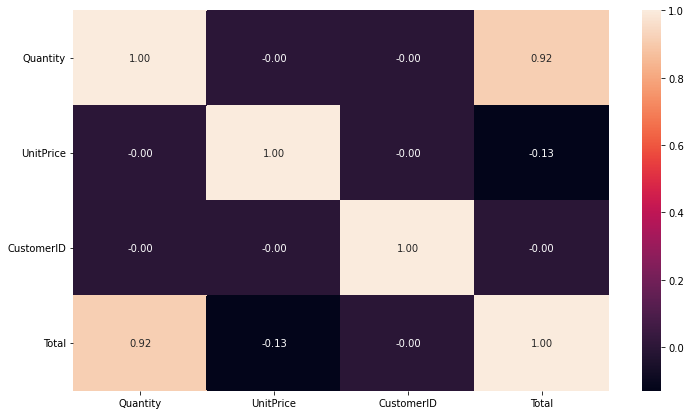

In [ ]:
plt.figure(figsize=(12,7))
a = sns.heatmap(pearson, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=0)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)

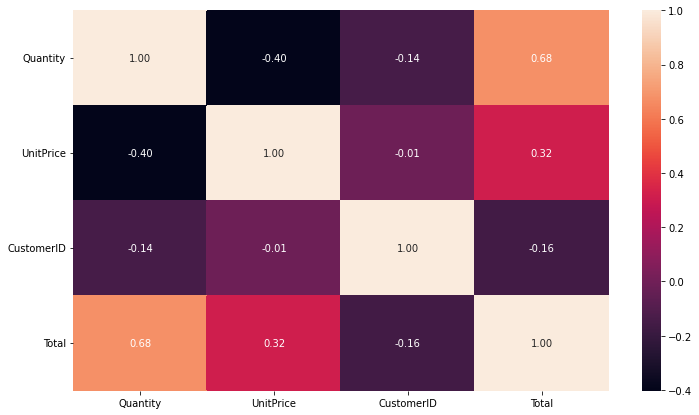

In [ ]:
plt.figure(figsize=(12,7))
a = sns.heatmap(spearman, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=0)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)

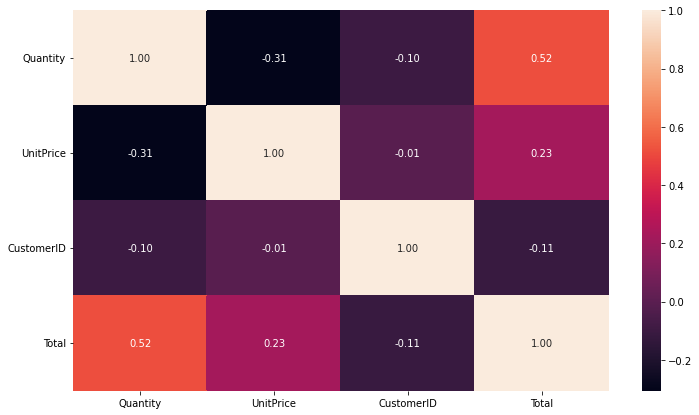

In [ ]:
plt.figure(figsize=(12,7))
a = sns.heatmap(kendall, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=0)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)

#### Bar Plot

In [ ]:
df['Quantity'].value_counts() # menghitung jumlah setiap species

 1        73314
 12       60033
 2        58003
 6        37688
 4        32183
          ...  
 828          1
 560          1
-408          1
 512          1
-80995        1
Name: Quantity, Length: 436, dtype: int64

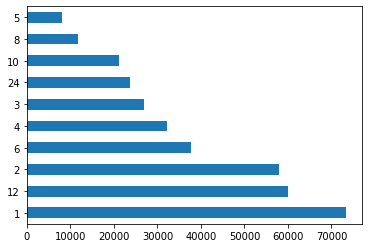

In [ ]:
df['Quantity'].value_counts()[:10].plot(kind='barh')


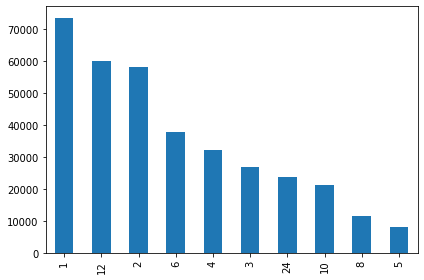

In [ ]:
df['Quantity'].value_counts()[:10].plot.bar()
plt.tight_layout()
plt.show()

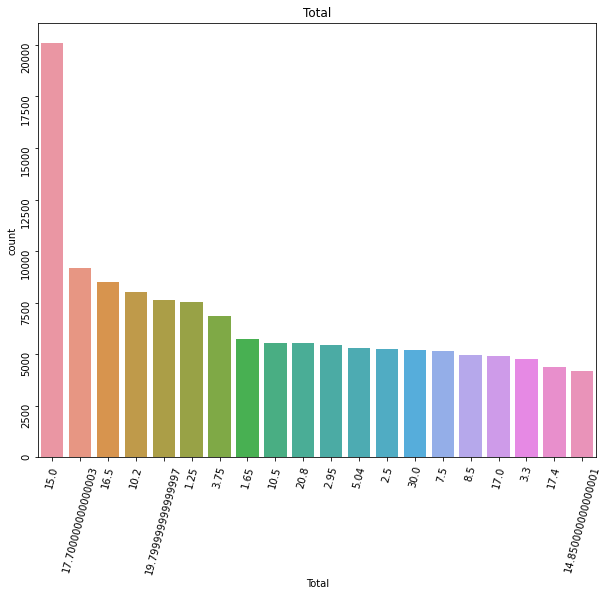

In [ ]:
bar = df['Total'].value_counts().head(20).index
plt.tight_layout()
sns.countplot(data=df, x='Total', order=bar)
plt.xticks(rotation=75)
plt.yticks(rotation=90)
plt.title("Total")
plt.gcf().set_size_inches(10, 8)

plt.show();

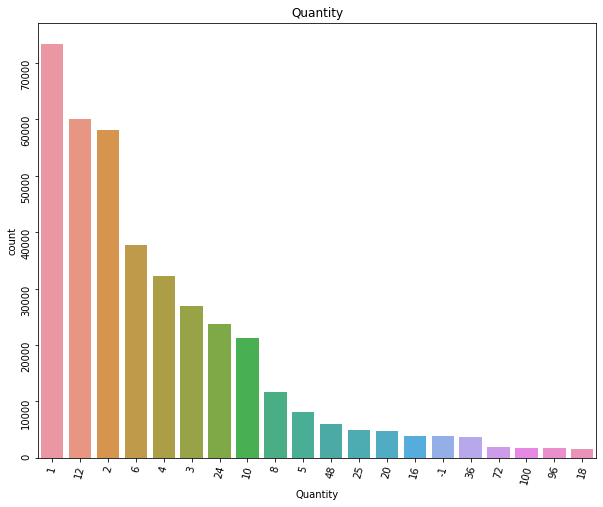

In [ ]:
bar = df['Quantity'].value_counts().head(20).index
plt.tight_layout()
sns.countplot(data=df, x='Quantity', order=bar)
plt.xticks(rotation=75)
plt.yticks(rotation=90)
plt.title("Quantity")
plt.gcf().set_size_inches(10, 8)

plt.show();

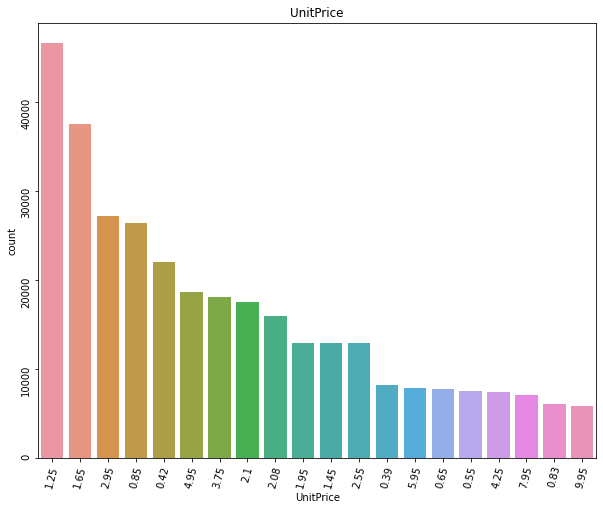

In [ ]:
bar = df['UnitPrice'].value_counts().head(20).index
plt.tight_layout()
sns.countplot(data=df, x='UnitPrice', order=bar)
plt.xticks(rotation=75)
plt.yticks(rotation=90)
plt.title("UnitPrice")
plt.gcf().set_size_inches(10, 8)

plt.show();

#### Pie Chart

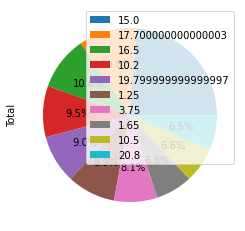

In [ ]:
df['Total'].value_counts()[:20].head(10).plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.show()

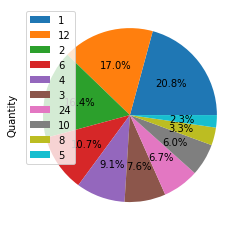

In [ ]:
df['Quantity'].value_counts()[:20].head(10).plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.show()

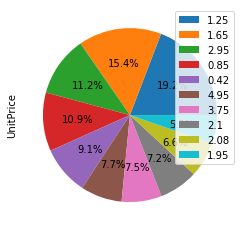

In [ ]:
df['UnitPrice'].value_counts()[:20].head(10).plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.show()

#### Line Plot

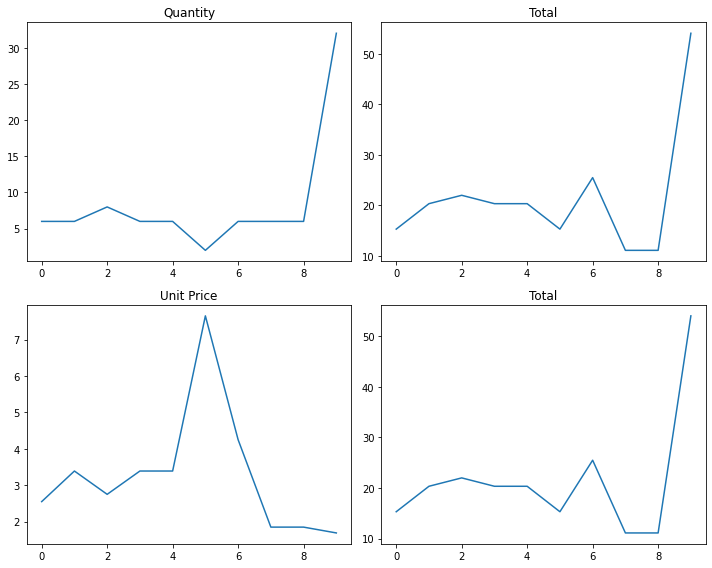

In [ ]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

df['Quantity'].head(10).plot.line(ax=ax[0][0])
ax[0][0].set_title('Quantity')

df['Total'].head(10).plot.line(ax=ax[0][1])
ax[0][1].set_title('Total')

df.UnitPrice.head(10).plot.line(ax=ax[1][0])
ax[1][0].set_title('Unit Price')

df.Total.head(10).plot.line(ax=ax[1][1])
ax[1][1].set_title('Total')


plt.tight_layout()

#### Histogram

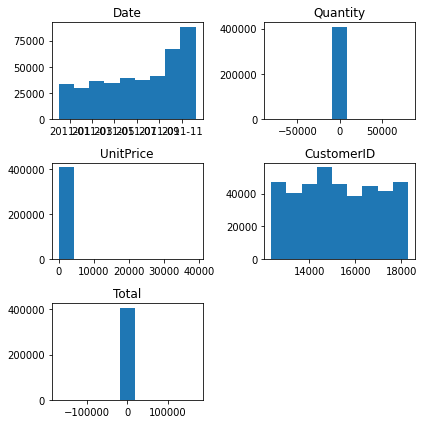

In [ ]:
df.hist(grid=False, figsize=(6,6),bins=9)
plt.tight_layout()

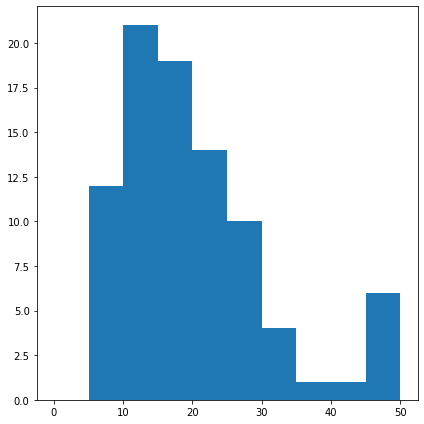

In [ ]:
df.Total.head(100).hist(grid=False, figsize=(6,6), bins=range(0,55,5))
plt.tight_layout()

(array([107087.,  67640.,  51438.,  85351.,  20907.,  11487.,  12944.,
          7291.,   3128.,   3418.,   2929.,   1537.,   1959.,   2300.,
          1522.,   1652.,   1356.,    712.,    967.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
        85, 90, 95]),
 <a list of 19 Patch objects>)

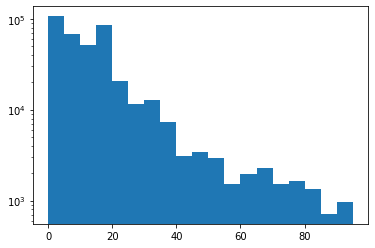

In [ ]:
plt.hist(df['Total'], bins=range(0,100,5), log=True)

(array([107087.,  67640.,  51438.,  85351.,  20907.,  11487.,  12944.,
          7291.,   3128.,   3418.,   2929.,   1537.,   1959.,   2300.,
          1522.,   1652.,   1356.,    712.,    967.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
        85, 90, 95]),
 <a list of 19 Patch objects>)

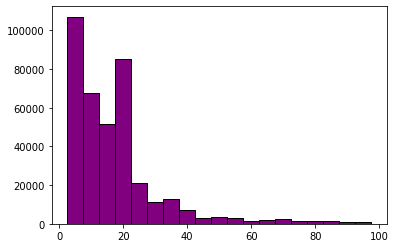

In [ ]:
plt.hist(df['Total'], bins=range(0,100,5), align='right', color='purple', edgecolor='black')

#### Boxplot

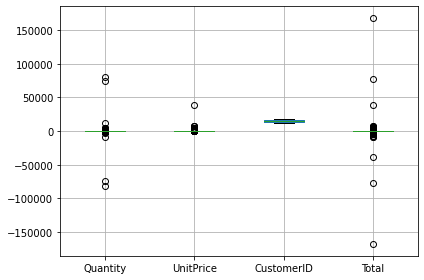

In [ ]:
df.boxplot()
plt.tight_layout()

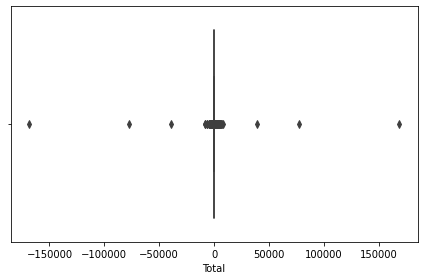

In [ ]:
sns.boxplot(x=df['Total'])
plt.tight_layout()

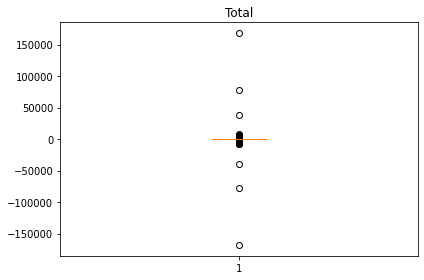

In [ ]:
plt.boxplot(df['Total'],boxprops=dict(color='red'))
plt.title('Total')
plt.tight_layout()

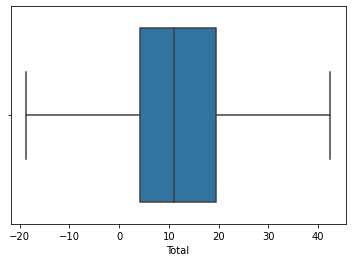

In [ ]:
Q1 = df["Total"].quantile(0.25)
Q3 = df["Total"].quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

more_than     = (df["Total"] > maximum)
lower_than    = (df["Total"] < minimum)
df["Total"] = df["Total"].mask(more_than, maximum) 
df["Total"] = df["Total"].mask(lower_than, minimum)

ax = sns.boxplot(x=df["Total"])

#### Scatter Plot

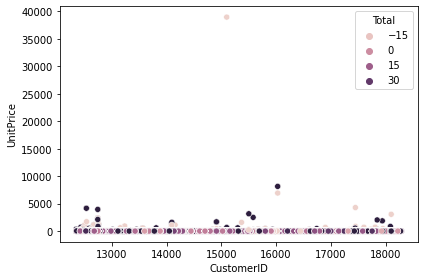

In [ ]:
sns.scatterplot(x='CustomerID', y='UnitPrice', data=df, hue='Total')
plt.tight_layout()

#### Violin Plot

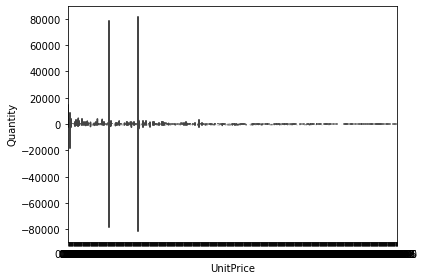

In [ ]:
sns.violinplot(data=df, y='Quantity', x='UnitPrice', inner='quartile')
plt.tight_layout()

### Dataset: Simple Regression ARIMA

#### Import Modules Forcasting

In [ ]:
import itertools
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA

#### Mengubah Date ke Index

In [ ]:
df.set_index('Date', inplace=True)
df

,Quantity,UnitPrice,CustomerID,Total
Date,,,,
2010-12-01,6,2.55,17850.0,15.30
2010-12-01,6,3.39,17850.0,20.34
2010-12-01,8,2.75,17850.0,22.00
2010-12-01,6,3.39,17850.0,20.34
2010-12-01,6,3.39,17850.0,20.34
...,...,...,...,...
2011-12-09,12,0.85,12680.0,10.20
2011-12-09,6,2.10,12680.0,12.60
2011-12-09,4,4.15,12680.0,16.60


#### Resampling time series data

In [ ]:
y = df['Total'].resample('D').mean()

y.head(10)

Date
2010-12-01    14.545986
2010-12-02    15.000083
2010-12-03    14.206473
2010-12-04          NaN
2010-12-05     9.467320
2010-12-06    11.651418
2010-12-07    16.619762
2010-12-08    14.046373
2010-12-09    13.125560
2010-12-10    14.138944
Freq: D, Name: Total, dtype: float64

In [ ]:
y.isna().sum() # Memeriksa Mising value di y

69

In [ ]:
y.fillna(method='ffill', inplace=True) # fill mising value
y.isnull().sum()

0

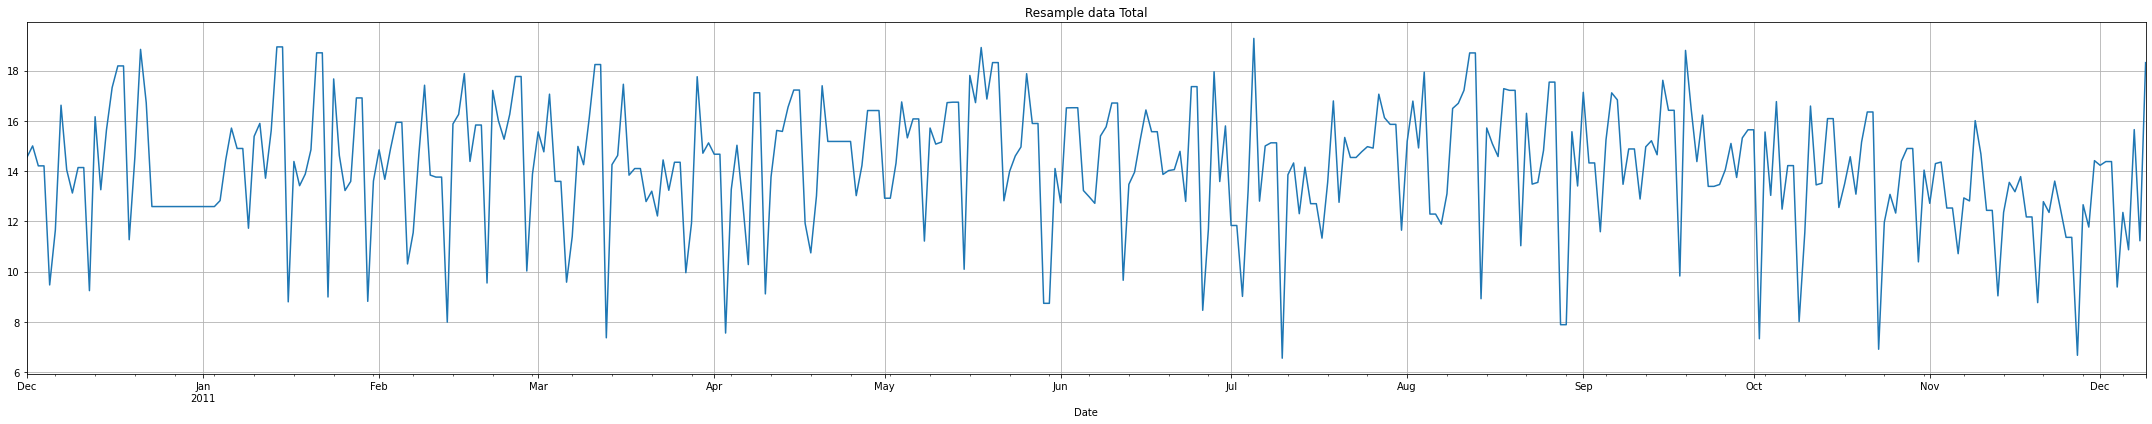

In [ ]:
y.plot(grid=True, figsize=(30, 6))
plt.title('Resample data Total')

plt.tight_layout()

#### Seasonal Decomposition
Ada metode lain untuk memvisualisasikan data deret waktu. Metode ini disebut dekomposisi deret waktu. Ini memungkinkan kita untuk menguraikan deret waktu menjadi tiga komponen berbeda - tren, musiman, dan kebisingan.

Python menyediakan modul statsmodels yang menyediakan alat dan teknik untuk analisis dan pemodelan statistik. Modul statsmodels ini menyediakan fungsi season_decompose untuk melakukan dekomposisi musiman.

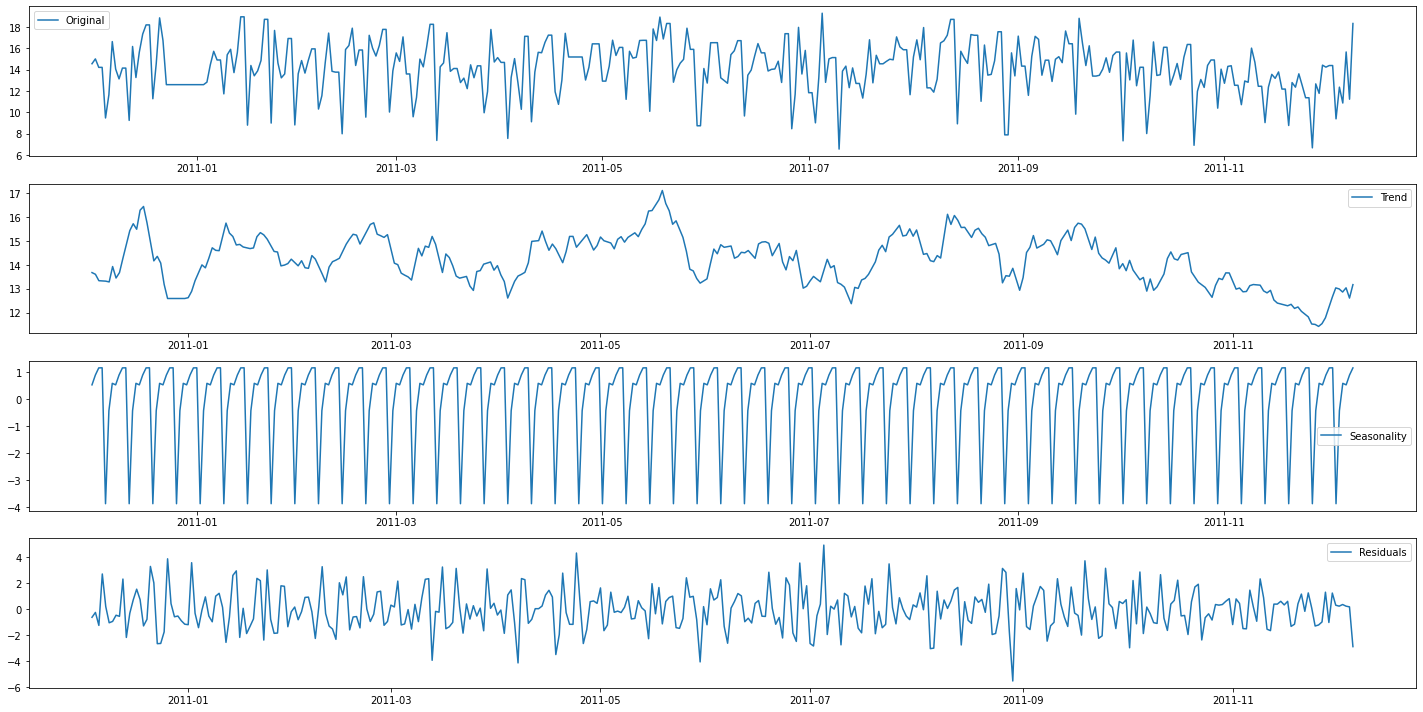

In [ ]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(y, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout();

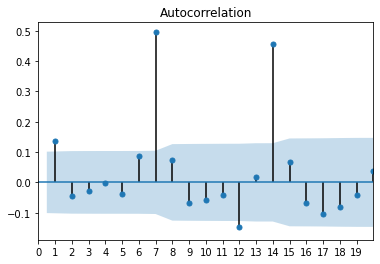

In [ ]:
plot_acf(y.dropna(),zero=False)
plt.xlim(0,20)
plt.xticks(np.arange(0,20,1))
plt.show(); #q=1 or q=0

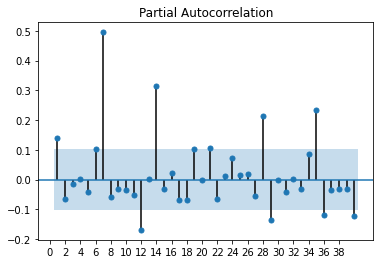

In [ ]:
plot_pacf(y.dropna(),zero=False,lags=40,method='ols',alpha=0.05)
plt.xticks(np.arange(0,40,2))
plt.show(); # p=3,5

#### Forecasts Metode ARIMA

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)


# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))


# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


print('Examples of parameter combinations for Seasonal ARIMA are as follows:-')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA are as follows:-
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

arr_aic = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            aic = results.aic

            arr_aic.append(aic);

            print('ARIMA{}x{}4 - AIC:{}'.format(param, param_seasonal, aic))
        except:
            continue


print(min(arr_aic))

ARIMA(0, 0, 0)x(0, 0, 0, 12)4 - AIC:3051.4142661501346
ARIMA(0, 0, 0)x(0, 0, 1, 12)4 - AIC:2625.569262477511
ARIMA(0, 0, 0)x(0, 1, 0, 12)4 - AIC:1995.94487740351
ARIMA(0, 0, 0)x(0, 1, 1, 12)4 - AIC:1675.5673560412642
ARIMA(0, 0, 0)x(1, 0, 0, 12)4 - AIC:1996.226421821767
ARIMA(0, 0, 0)x(1, 0, 1, 12)4 - AIC:1742.7735059646634
ARIMA(0, 0, 0)x(1, 1, 0, 12)4 - AIC:1805.5578703431925
ARIMA(0, 0, 0)x(1, 1, 1, 12)4 - AIC:1681.9757610537754
ARIMA(0, 0, 1)x(0, 0, 0, 12)4 - AIC:2653.5392892377313
ARIMA(0, 0, 1)x(0, 0, 1, 12)4 - AIC:2377.8821774653925
ARIMA(0, 0, 1)x(0, 1, 0, 12)4 - AIC:1980.5244366187485
ARIMA(0, 0, 1)x(0, 1, 1, 12)4 - AIC:1666.903872462518
ARIMA(0, 0, 1)x(1, 0, 0, 12)4 - AIC:1982.5188105559673
ARIMA(0, 0, 1)x(1, 0, 1, 12)4 - AIC:1734.243319264246
ARIMA(0, 0, 1)x(1, 1, 0, 12)4 - AIC:1796.394564565465
ARIMA(0, 0, 1)x(1, 1, 1, 12)4 - AIC:1672.1741277228875
ARIMA(0, 1, 0)x(0, 0, 0, 12)4 - AIC:1947.648435847456
ARIMA(0, 1, 0)x(0, 0, 1, 12)4 - AIC:1877.8430316458987
ARIMA(0, 1, 0)x(0,

In [ ]:
model = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 0, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = model.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1484      0.057      2.607      0.009       0.037       0.260
ma.S.L12      -1.0000    426.661     -0.002      0.998    -837.241     835.241
sigma2         6.2984   2687.291      0.002      0.998   -5260.695    5273.291


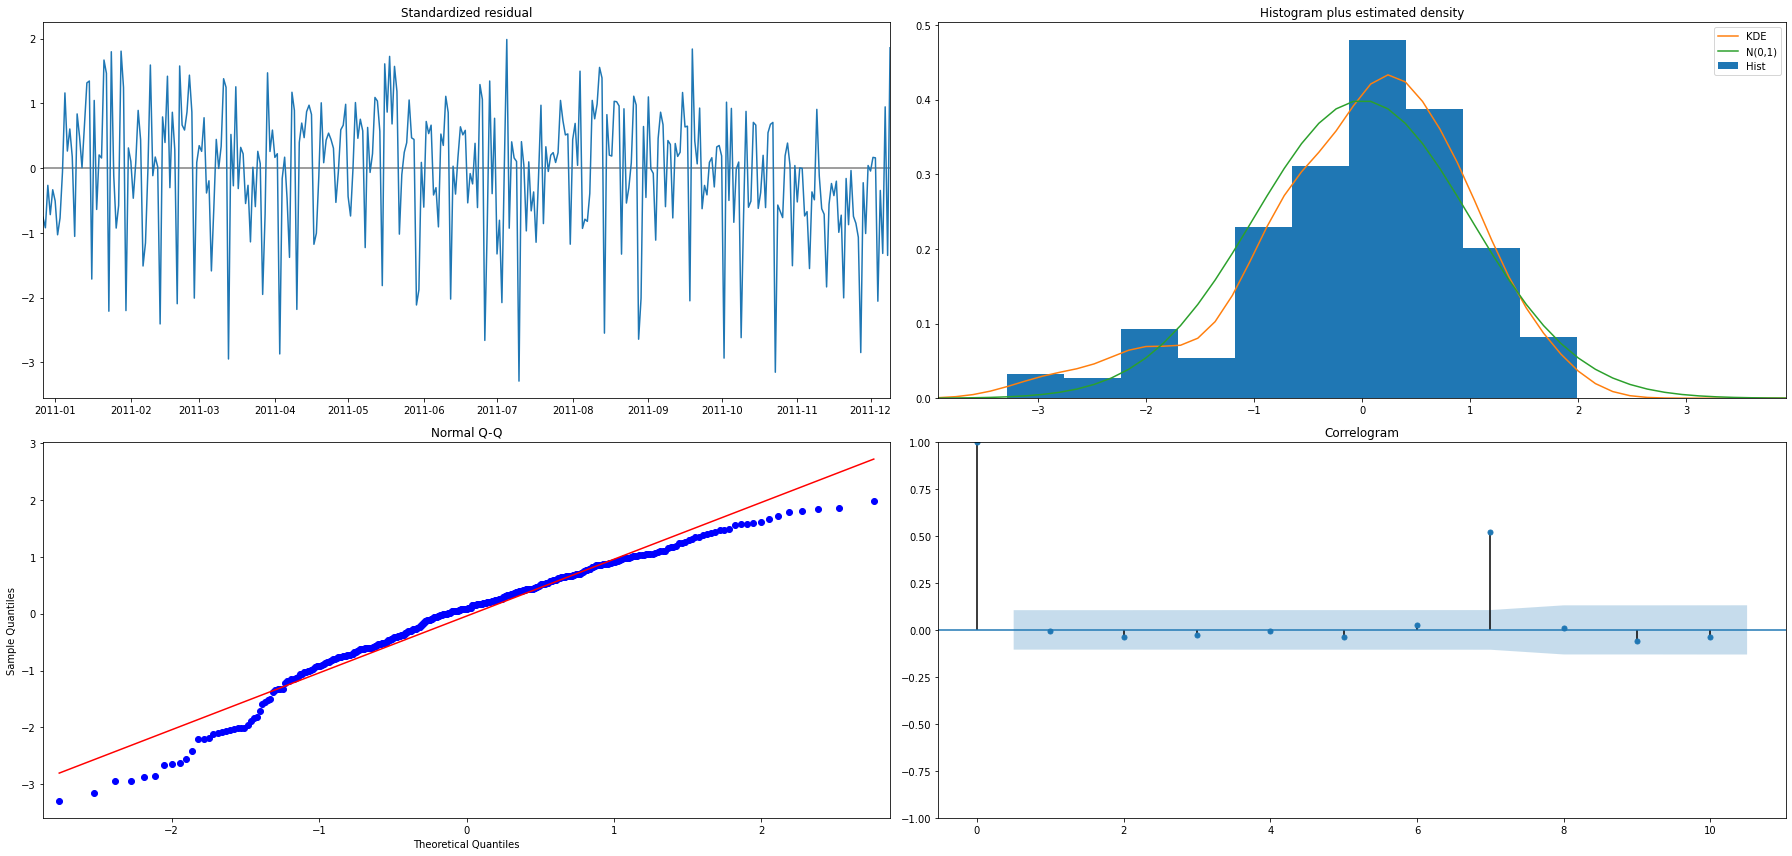

In [ ]:
results.plot_diagnostics(figsize=(25, 12))

plt.tight_layout()

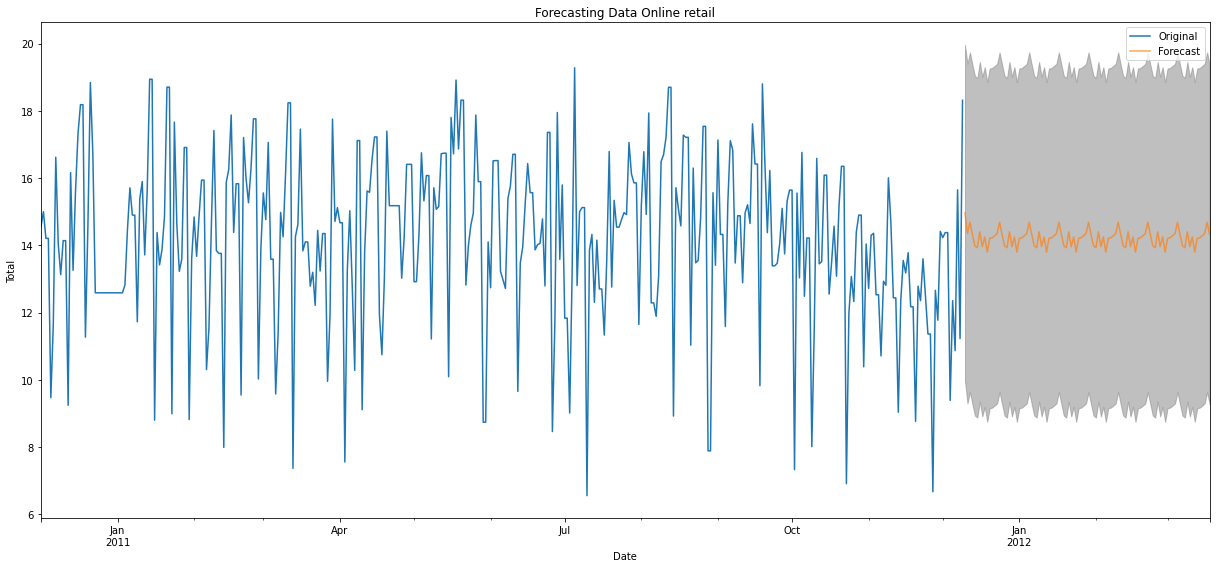

In [ ]:
# Get forecast 100 steps ahead in future
pred_uc = results.get_forecast(steps=100)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = y.plot(label='Original', figsize=(17, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='grey', alpha=.5)

ax.set_xlabel('Date')
ax.set_ylabel('Total')

plt.title('Forecasting Data Online retail')
plt.legend()
plt.tight_layout()